Gebil Jibul

Description: This program demonstrates the building, training, and evaluation of a neural network using TensorFlow(library for machine learning and artificial intelligence).

Using TensorFlow or Sciki, to create a neural network model from dataset, with the same target (numerical predictive model).

### Imports

In [9]:
import pandas as pd

data = pd.read_csv('data/startup_profit.csv')

# Cleans column names
data.rename(str.strip, axis='columns', inplace=True)
data.rename(str.lower, axis='columns', inplace=True)

# Converts profit column to type float
data['profit'] = data['profit'].replace("[$,]", "", regex=True).astype(float)

# One-hot encodes sate column
data = pd.get_dummies(data)

data.head()

,r&d spend,administration,marketing spend,profit,state_California,state_FL,state_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


### Data Splits

In [280]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Splits provided df into three ways (six total; input and target setsg). 
def tri_split(df, target: str, 
              train: float, validation: float, test: float, 
              standard_scale=False, random_state=None, bootstrap=False, 
              sample_frac=1):
    
    # Verifies args equal 100%
    if sum([train, validation, test]) != 1:
        raise ValueError('Sum of sizes is not equal to one.')
        
    # Collects indices for each split, then splits
    indices = [int(train*len(df)), int((train+validation)*len(df))]
    train, validate, test = np.split(
        df.sample(frac=sample_frac, random_state=random_state, replace=bootstrap), 
        indices_or_sections=indices
    )
    
    # Enables usage of kwarg True for all columns
    if standard_scale is True:
        standard_scale = list(df.columns)
            
    # Standardizes if specified to do so
    if standard_scale:
        sc = StandardScaler()
        train[standard_scale]    = sc.fit_transform(train[standard_scale])
        validate[standard_scale] = sc.transform(validate[standard_scale])
        test[standard_scale]     = sc.transform(test[standard_scale])
    
    # Splits input data from target data
    return dict(
        X_train = train.drop(columns=[target]).to_numpy(), 
        y_train = train[target].to_numpy().reshape(-1,1),
        
        X_vali  = validate.drop(columns=[target]).to_numpy(), 
        y_vali  = validate[target].to_numpy().reshape(-1,1),
        
        X_test  = test.drop(columns=[target]).to_numpy(), 
        y_test  = test[target].to_numpy().reshape(-1,1)
    )

In [279]:
data_dict = tri_split(data, target='profit', train=0.60, validation=0.20, test=0.20, standard_scale=True)

X_train, y_train, X_vali, y_vali, X_test, y_test = data_dict.values()

### Designing Architecture

In [272]:
from keras.models import Sequential
from keras.layers import Dense
from keras import backend as K 

# Clears any sequentials from prior cell runs
K.clear_session()

# Input data shape
n_input = X_train.shape[-1]
# Nodes per hidden layer
n_hidden1 = 32
n_hidden2 = 16
n_hidden3 = 8
# Number of outputs
n_outputs = 1

# Architecture of NN
nn_reg = Sequential(
    [
        Dense(units=n_hidden1, activation='relu', input_shape=(n_input,)),
        Dense(units=n_hidden2, activation='relu'),
        Dense(units=n_hidden3, activation='relu'),
        Dense(units=n_outputs, activation=None)
    ]
)

# Compiles with loss and optimizer functions
nn_reg.compile(loss='mean_squared_error', optimizer='adam')

# Displays summary of network
nn_reg.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                224       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 897
Trainable params: 897
Non-trainable params: 0
_________________________________________________________________


### Training

In [273]:
batch_size = 64
n_epochs = 50
nn_reg.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size)

Epoch 1/50
1/1 [==============================] - 0s 329ms/step - loss: 0.8456
Epoch 2/50
1/1 [==============================] - 0s 16ms/step - loss: 0.8261
Epoch 3/50
1/1 [==============================] - 0s 0s/step - loss: 0.8063
Epoch 4/50
1/1 [==============================] - 0s 12ms/step - loss: 0.7868
Epoch 5/50
1/1 [==============================] - 0s 5ms/step - loss: 0.7673
Epoch 6/50
1/1 [==============================] - 0s 5ms/step - loss: 0.7481
Epoch 7/50
1/1 [==============================] - 0s 6ms/step - loss: 0.7290
Epoch 8/50
1/1 [==============================] - 0s 5ms/step - loss: 0.7100
Epoch 9/50
1/1 [==============================] - 0s 5ms/step - loss: 0.6913
Epoch 10/50
1/1 [==============================] - 0s 7ms/step - loss: 0.6757
Epoch 11/50
1/1 [==============================] - 0s 4ms/step - loss: 0.6618
Epoch 12/50
1/1 [==============================] - 0s 4ms/step - loss: 0.6478
Epoch 13/50
1/1 [==============================] - 0s 4ms/step - loss:

In [274]:
from sklearn.metrics import mean_squared_error

y_pred_train = nn_reg.predict(X_train)
y_pred_val = nn_reg.predict(X_vali)
y_pred_test  = nn_reg.predict(X_test)

train_mse = mean_squared_error(y_true=y_train, y_pred=y_pred_train)
val_mse = mean_squared_error(y_true=y_vali, y_pred=y_pred_val)
test_mse = mean_squared_error(y_true=y_test, y_pred=y_pred_test)

print(f'''
Train MSE: {train_mse} \n
Val MSE: {val_mse} \n
Test MSE: {test_mse}
''')



Train MSE: 0.20147215062258503 

Val MSE: 0.4982778943015799 

Test MSE: 0.18720980631961423



<AxesSubplot:>

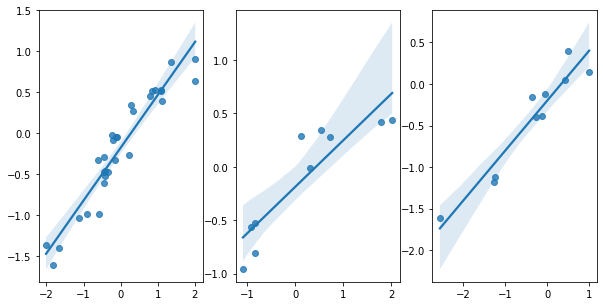

In [275]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 3, figsize=(10,5))
sns.regplot(x=y_train, y=y_pred_train, ax=ax[0])
sns.regplot(x=y_vali,  y=y_pred_val,   ax=ax[1])
sns.regplot(x=y_test,  y=y_pred_test,  ax=ax[2])

The model looks like it's performing well, despite the sample sizes being quite small. If the model appeared to be struggling, I may consider attempting to bootstrap the data. However, in such a case, I'd imagine that I should be careful to make sure certain observations are not included in the bootstap so that they can be used for test/validation. By my logic, this would keep test data from leaking into the training data. Regardless, the step doesn't appear to be necessary.

The split function I built is definately a little overkill, but it was built with the idea that I'll probably be reusing it a lot--thus, I favored features over simplicity. 